# Import LIb

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

# Model Loading

In [10]:
# Load the InceptionV3 model pre-trained on ImageNet
model = InceptionV3(weights='imagenet')

## Image Processing

In [11]:
# Function to download and prepare an image
def load_and_prepare_image(img_url):
    # Download and decode the image
    path = tf.keras.utils.get_file(origin=img_url, fname=img_url.split("/")[-1], untar=False)
    img = image.load_img(path, target_size=(299, 299))
    
    # Convert the image to an array and preprocess it
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    return img_array

In [12]:
# URLs of high-quality images
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_March_2010-1.jpg"
]

## Output

1/1 [==============================] - 1s 1s/step


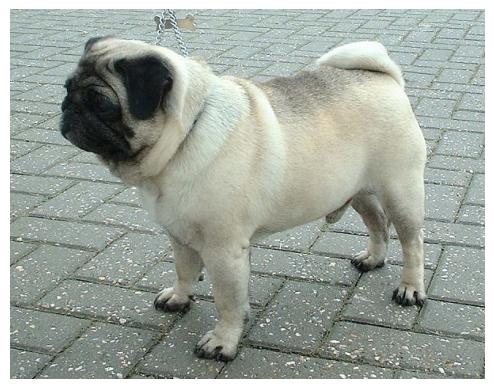

Predictions:
1: pug (92.99%)
2: Norwegian_elkhound (1.06%)
3: basenji (0.29%)
1/1 [==============================] - 0s 31ms/step


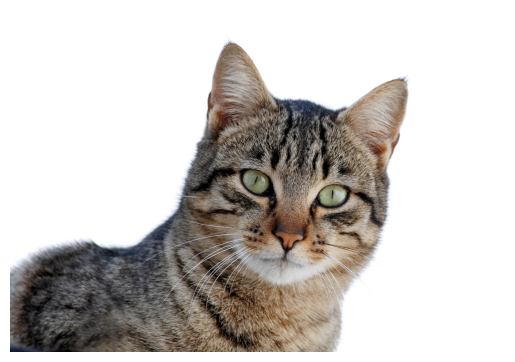

Predictions:
1: tabby (50.27%)
2: Egyptian_cat (30.28%)
3: tiger_cat (12.69%)


In [13]:
# Load and predict each image
for url in image_urls:
    img_array = load_and_prepare_image(url)
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    
    # Display the image and predictions
    img = image.load_img(tf.keras.utils.get_file(origin=url, fname=url.split("/")[-1], untar=False))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print("Predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score * 100:.2f}%)")